In [48]:
###Support Vector Machine (SVM) Classification###

In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
##We are ımporting the libraries which are pandas (for read the documents from excel), matplotlib (graph), numpy (for the big matrices and higher level mathematical processing).
data = pd.read_csv("input/data.csv") #Reading the source from excel which is uplaoded by myself in the input folder.
#print(data.info())
#print(data.head())
#print(data.describe())
# %%
data.drop(["id","Unnamed: 32"],axis=1,inplace=True) # We dropped the "ID" "Unnamed32" Because id is not needles for calculatıon and the Unnamed 32 is the null value. It can be make a mistake for processing
data.head() #Let' see the table
# malignant = M 
# benign = B     

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
print(data.dtypes) # We are Displaying the data types 

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [54]:
data.describe() #Description Part of the table

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


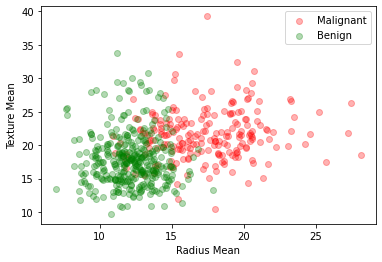

In [56]:
M = data[data.diagnosis == "M"] #We seperated the diagnosis two part one of them is M the other one is B
B = data[data.diagnosis == "B"]
# scatter plot it is the type of matplotlib which is most useful one for this data
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="Malignant",alpha= 0.3)# I am deciding the color of bad diagnosis
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="Benign",alpha= 0.3)# I am deciding the color of good diagnosis
plt.xlabel("Radius Mean") 
plt.ylabel("Texture Mean")
# We named the line y as radius mean, and x 'as texture mean
plt.legend()
plt.show()

In [58]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1) #We exchaned the diagnosis to number
# %%

# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)) #This is the normalization process
data.head(10) # It writes 10 element of table

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [60]:
# train test split
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# %%  We are adding SVM lib
from sklearn.svm import SVC
 
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
# %% test
print("SVM Accuracy Score: ",svm.score(x_test,y_test)) # Testing our score
#Let's find our score for SVM Algorithm


SVM Accuracy Score:  0.9649122807017544


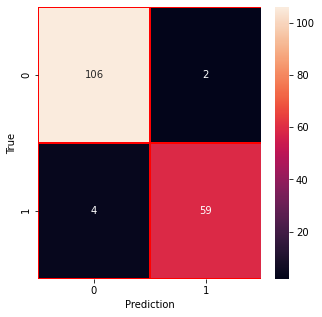

In [62]:
#%% confusion matrix
y_pred = svm.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix # we aee adding the confusion matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Prediction")
plt.ylabel("True")
#We named the line y as True, and x 'as Prediction
plt.show()
#In here we have an matrices table, When we look at the graph the left side of the graph is original values that represent by 1 or 0, and under part of the graph is prediction part. We see a pretty good statistic by making 165 accurate predictions in total. Only 6 guesses are wrong

In [64]:
###Naive Bayes Classification###

In [66]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
##We are ımporting the libraries which are pandas (for read the documents from excel), matplotlib (graph), numpy (for the big matrices and higher level mathematical processing).
data = pd.read_csv("input/data.csv") #Reading the source from excel which is uplaoded by myself in the input folder.
#print(data.info())
#print(data.head())
#print(data.describe())
# %%
data.drop(["id","Unnamed: 32"],axis=1,inplace=True) # We dropped the "ID" "Unnamed32" Because id is not needles for calculatıon and the Unnamed 32 is the null value. It can be make a mistake for processing
data.head() #Let' see the table
# malignant = M  
# benign = B    

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [68]:
print(data.dtypes) # We are Displaying the data types 

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

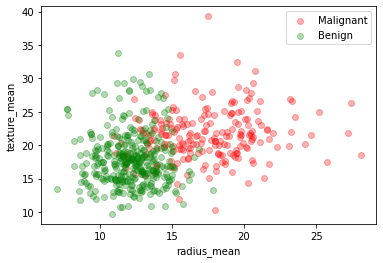

In [70]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot it is the type of matplotlib which is most useful one for this data
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="Malignant",alpha= 0.3)# I am deciding the color of bad diagnosis
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="Benign",alpha= 0.3)# I am deciding the color of good diagnosis
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [72]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1) #We exchaned the diagnosis to number// Because when we trying to proccess with the int values there will be mistake.

# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [74]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# %% Naive bayes 
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

nb.score(x_test,y_test)
 # %% test
print("Navie Bayes Accuracy Score: ",nb.score(x_test,y_test))
#We are trying to find our score

Navie Bayes Accuracy Score:  0.935672514619883


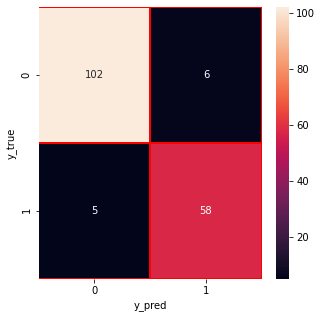

In [76]:
#%% confusion matrix
y_pred = nb.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
#In here we have 160 true predict than 11 wrong predict.

In [78]:
###DECİSİON TREE###

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("input/data.csv")

# %%
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.tail()
# malignant = M  
# benign = B     

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [82]:
print(data.dtypes) # We are Displaying the data types 

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

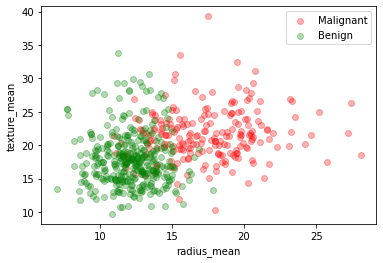

In [84]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot it is the type of matplotlib which is most useful one for this data
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="Malignant",alpha= 0.3)# I am deciding the color of bad diagnosis
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="Benign",alpha= 0.3)# I am deciding the color of good diagnosis
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [86]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [88]:
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

#%%
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Decision Tree Accuracy Score: ", dt.score(x_test,y_test))

Decision Tree Accuracy Score:  0.9302325581395349


[Text(214.70869565217393, 203.85, 'X[7] <= 0.255\ngini = 0.468\nsamples = 483\nvalue = [303, 180]'),
 Text(138.28695652173914, 176.67000000000002, 'X[20] <= 0.317\ngini = 0.102\nsamples = 297\nvalue = [281, 16]'),
 Text(101.89565217391305, 149.49, 'X[10] <= 0.186\ngini = 0.035\nsamples = 278\nvalue = [273, 5]'),
 Text(72.78260869565217, 122.31, 'X[24] <= 0.703\ngini = 0.022\nsamples = 275\nvalue = [272, 3]'),
 Text(58.22608695652174, 95.13, 'X[14] <= 0.054\ngini = 0.014\nsamples = 274\nvalue = [272, 2]'),
 Text(29.11304347826087, 67.94999999999999, 'X[1] <= 0.345\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(14.556521739130435, 40.77000000000001, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(43.66956521739131, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(87.33913043478262, 67.94999999999999, 'X[21] <= 0.568\ngini = 0.007\nsamples = 267\nvalue = [266, 1]'),
 Text(72.78260869565217, 40.77000000000001, 'gini = 0.0\nsamples = 250\nvalue = [250, 0]'),
 Text

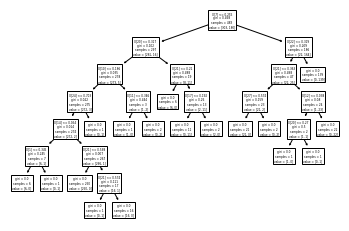

In [90]:
from sklearn import tree # I uploaded
tree.plot_tree(dt)
#In here we are using the sklearn lib for the get a tree about data

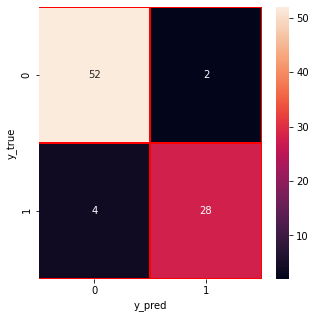

In [92]:
#%% confusion matrix
y_pred = dt.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
#In here we have an matrices table, When we look at the graph the left side of the graph is original values that represent by 1 or 0, and under part of the graph is prediction part. We see a pretty good statistic by making 78
#  accurate predictions in total. Only 7 guesses are wrong

In [94]:
###RANDOM FOREST CLASSİFİCATİON

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("input/data.csv")
#print(data.info())
#print(data.head())
#print(data.describe())
# %%
data.head(10)
# malignant = M  
# benign = B     

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [98]:
print(data.dtypes) # We are Displaying the data types 

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [100]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True) 
data.tail()
 # We dropped the "ID" "Unnamed32" Because id is not needles for calculatıon and the Unnamed 32 is the null value. It can be make a mistake for processing

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


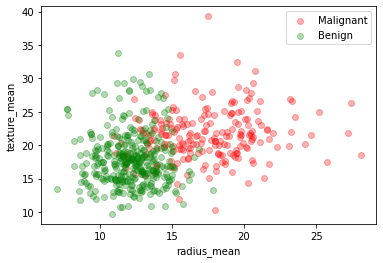

In [102]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot /// Scatter was one of the most beautiful matoltlib types I could use.
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="Malignant",alpha= 0.3) # I am deciding the color of bad diagnosis
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="Benign",alpha= 0.3)# I am deciding the color of good diagnosis
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [104]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
data.head() #In here we can see the dropped ıtems whic is ID and Unnamed 32:

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [106]:
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

#%%  random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("Random Forest Accuracy Score: ",rf.score(x_test,y_test))
#Let's find our score since we predict x how many % of them correctly predicted

Random Forest Accuracy Score:  0.9534883720930233


In [108]:
##Pretty Good Score

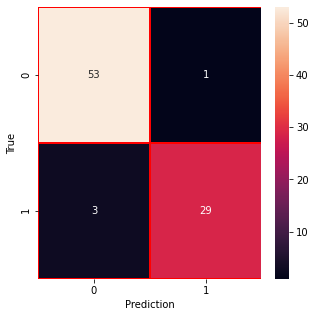

In [110]:
#%% confusion matrix
y_pred = rf.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns # seaborn librariy for the usign headmap..

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()
#In here we have an matrices table, When we look at the graph the left side of the graph is original values that represent by 1 or 0, and under part of the graph is prediction part. We see a pretty good statistic by making 82 accurate predictions in total. Only 4 guesses are wrong


In [112]:
##KNN

In [114]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
##We are ımporting the libraries which are pandas (for read the documents from excel), matplotlib (graph), numpy (for the big matrices and higher level mathematical processing).
data = pd.read_csv("input/data.csv") #Reading the source from excel which is uplaoded by myself in the input folder.
#print(data.info())
#print(data.head())
#print(data.describe())
# %%
data.drop(["id","Unnamed: 32"],axis=1,inplace=True) # We dropped the "ID" "Unnamed32" Because id is not needles for calculatıon and the Unnamed 32 is the null value. It can be make a mistake for processing
data.tail() #Let' see the table
# malignant = M  
# benign = B     

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [116]:
print(data.dtypes) # We are Displaying the data types 


diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

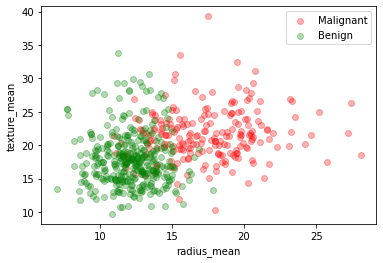

In [118]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot /// Scatter was one of the most beautiful matoltlib types I could use.
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="Malignant",alpha= 0.3)# I am deciding the color of bad diagnosis
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="Benign",alpha= 0.3)# I am deciding the color of good diagnosis
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [120]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)
# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [122]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# %%
# knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} KNN Accuracy score: {} ".format(3,knn.score(x_test,y_test)))
#Let's find our first score since we predict x how many % of them correctly predicted

 3 KNN Accuracy score: 0.9532163742690059 


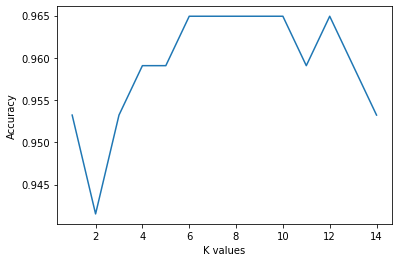

In [123]:
# find k value
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list) #plt.plot Codes give us the graph ( and we determine the range of grapf (1,15))
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()
#We are trying to find a k values for calculate the better accuracy

In [124]:
# knn model
knn = KNeighborsClassifier(n_neighbors = 8) # n_neighbors = k #We enter the value of k here
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} New KNN Accuracy score: {} ".format(3,knn.score(x_test,y_test)))
#In this graph we are trying to find a best k value for calculating the more reliable accuracy value.
#Values of k between 6 and 10 will increase our accuracy. Therefore, the best value is 8.

 3 New KNN Accuracy score: 0.9649122807017544 


In [125]:
#As we can easily see, there is an increase in ratios to our previous accuracy value.

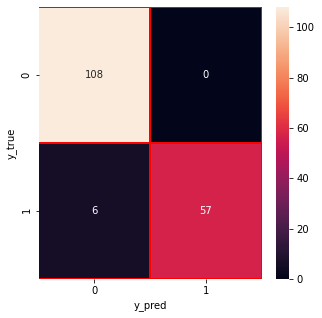

In [126]:
#%% confusion matrix
y_pred = knn.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
#In here we have an matrices table, When we look at the graph the left side of the graph is original values that represent by 1 or 0, and under part of the graph is prediction part. We see a pretty good statistic by making 165 accurate predictions in total. Only 6 guesses are wrong.
